# PCT_URBAN and Roof albedo figure
- This script is used to visualize PCT_URBAN and roof albedo parameters from the default input dataset;
- Simulations: None;

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr  
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import cartopy.feature as cfeature  
from matplotlib.ticker import MultipleLocator

In [2]:
path = '/work/n02/n02/yuansun/cesm/'
sfile = path + 'cesm_inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'
ds = xr.open_dataset(sfile)
lat  = ds['LATIXY'].values
lon  = ds['LONGXY'].values
PFTDATA_MASK = ds['PFTDATA_MASK']
PCT_URBAN = ds['PCT_URBAN'].values

In [4]:
linewidth = 0.5
linewidth2 = 1
fontsize = 6
labelsize = 6
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2100]
alpha=0.075
pad = 1
boundarywidth = 0.5
proj = ccrs.PlateCarree(central_longitude=180)
title = [['(a) PCT_URBAN - TBD', '(b) PCT_URBAN - HD', '(c) PCT_URBAN - MD'], 
         ['(d) ALB_ROOF - TBD', '(e) ALB_ROOF - HD', '(f) ALB_ROOF - MD']]
roof_albedo = ds['ALB_ROOF_DIR'][0,:,:,:]
x = 0.005
y1 = 0.95
y2 = 0.475
cs1 = []
cs2 = [] 
cmap = plt.cm.get_cmap('coolwarm')
extent = [-180,180,-90,90]
resolution = '110m'
padding = 4

/tmp/ipykernel_5651/1191867598.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


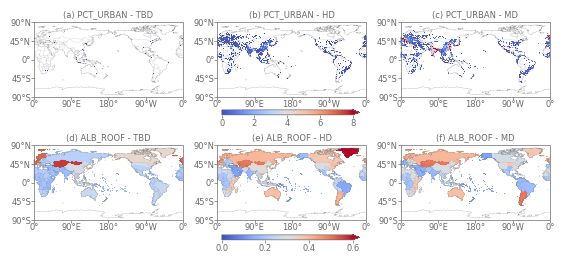

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(5.5, 2.5), subplot_kw={'projection': proj})
for i in range(2):
    for j in range(3):
        if i==0:
            mask = PCT_URBAN > 0
            PCT_URBAN_filt = np.ma.masked_array(PCT_URBAN, mask=~mask)
            cs=axs[i,j].pcolormesh(lon-180,lat, PCT_URBAN_filt[j,:,:] ,cmap=cmap, vmin=0, vmax=8)
            cs1.append(cs)
        elif i==1:
            mask = roof_albedo[j,:,:] > 0
            roof_albedo_filt = np.ma.masked_array(roof_albedo[j,:,:], mask=~mask)
            cs=axs[i,j].pcolormesh(lon-180, lat , roof_albedo_filt ,cmap=cmap, vmin=0, vmax=0.6) 
            cs2.append(cs)
        axs[i,j].set_extent(extent, crs=proj)
        axs[i,j].add_feature(cfeature.BORDERS,lw=0.1, linestyle='dashed', edgecolor=labelcolor,alpha=1 )
        axs[i,j].coastlines(resolution=resolution,linestyle='dashed',linewidth=0.2,zorder=2,color=labelcolor)
        axs[i,j].set_xticks(np.arange(extent[0], extent[1] +1, 90), crs = proj)
        axs[i,j].tick_params(axis='both', labelsize=labelsize, length=2, pad =0.1, width = boundarywidth,colors=labelcolor)
        axs[i,j].set_yticks(np.arange(extent[-2], extent[-1] + 1, 45), crs = proj)
        axs[i,j].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
        axs[i,j].yaxis.set_major_formatter(LatitudeFormatter())
        axs[i,j].set_title(title[i][j], fontsize=labelsize, pad=padding,color = labelcolor)
  
for ax in axs.flat:
    for spine in ax.spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)

left =0.04
right = 0.99
plt.subplots_adjust(left=0.045, right=0.99, bottom=0.13, top=0.92, wspace=0.2, hspace= 0.65)        

bottom1 = 0.55
bottom2 = 0.05
width = 0.25
height = 0.02
left2 =(1-width+left+right-1)/2

cax1 = fig.add_axes([left2, bottom1, width, height])
cbar1 = fig.colorbar(cs1[0],ax=axs[1,:], cax=cax1, shrink=0.63,orientation='horizontal',pad=0.1, extend='max', fraction=0.05)
cbar1.ax.tick_params(length=2, labelsize=labelsize, pad = pad, width=boundarywidth, color=labelcolor)
cbar1.outline.set_linewidth(boundarywidth)
cbar1.outline.set_edgecolor(labelcolor)
for tick in cbar1.ax.get_xticklabels():
    tick.set_color(labelcolor)
    
cax2 = fig.add_axes([left2, bottom2, width, height])
cbar2 = fig.colorbar(cs2[0],ax=axs[1,:],cax=cax2, shrink=0.63, orientation='horizontal',pad=0.1, extend='max', fraction=0.05)
cbar2.ax.tick_params(length=2, labelsize=labelsize, pad = pad, width=boundarywidth, color=labelcolor)
cbar2.outline.set_linewidth(boundarywidth)
cbar2.outline.set_edgecolor(labelcolor)
for tick in cbar2.ax.get_xticklabels():
    tick.set_color(labelcolor)
  

In [6]:
fig.savefig('Constant_urban.png',dpi=300) 
fig.savefig('Constant_urban.pdf',dpi=600)   